### Read in all Sales analysis csv's and perform EDA



In [9]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [10]:
#Create a list of all files in current directory
all_files = os.listdir()

In [11]:
# Create an empty list to assign csv files
csv_files = []

# Create a lis of only the csv files in current directory
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else: 
        pass

csv_files
        

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [12]:
df_og = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index = True)


In [16]:
#create a of of original df

df = df_og.copy(deep=True)

# Lower case all the columns as a convenience

df.columns = df.columns.str.lower()

In [17]:
#Several rows are completely blank, drop empty rows where all rows are blank

df = df.dropna(how='all')

# Several rows are a copy of the header, delete all rows where header values are present

df = df.drop(df[df['order id'] == 'Order ID'].index)

In [21]:
df.head()

,order id,product,quantity ordered,price each,order date,purchase address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [35]:
# Index values were lost in the processing of dropping rows, reset index values

df.reset_index(drop = True, inplace = True)
df.head()

,order id,product,quantity ordered,price each,order date,purchase address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [41]:
# Convert quantity ordered and price each to numeric values to facilitate later calculations

df['quantity ordered'] = pd.to_numeric(df['quantity ordered'])
df['price each'] = pd.to_numeric(df['price each'])

In [43]:
# Extract state and city from purchase address these fields may be useful for later visualization and market segmentation

df['state'] = df['purchase address'].str.split(',').str[2].str.strip().str[0:2]
df['city'] = df['purchase address'].str.split(',').str[1]

# Create an order total column  

df['order_total'] = df['quantity ordered'] * df['price each']
df.head()

,order id,product,quantity ordered,price each,order date,purchase address,state,city,order_total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",TX,Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",MA,Boston,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",CA,Los Angeles,11.99


In [48]:
df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'state', 'city', 'order_total'],
      dtype='object')

In [51]:
# Reorder columns

df = df[['order id', 'product', 'quantity ordered', 'price each', 'order_total', 'order date',
       'purchase address', 'city', 'state']]

In [59]:
# total length of column - unique values in the column implies there may be 45163 repeat purchases

len(df['purchase address']) - df['purchase address'].nunique()

45163

In [60]:
# assign a unique id for each purchase address, use as a proxy for customer_id/address_id

df['address_id'] = pd.factorize(df['purchase address'])[0]

<ipython-input-60-cce090f3056c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address_id'] = pd.factorize(df['purchase address'])[0]


In [83]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,TX,0
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,MA,1
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,3


In [84]:
# Save the cleaned and transfored dataframe to a new csv. for quick access 

df.to_csv('cleaned_sales_analysis.csv')

In [85]:
# Convert order date to a date time format

df['order date'] = pd.to_datetime(df['order date'], infer_datetime_format = True)

In [86]:

df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX,0
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA,1
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,3


In [88]:
# Create new frame to summarize order quantity by product

total_ordered_product = df.groupby('product', as_index = False)['quantity ordered'].sum()
total_ordered_product = total_ordered_product.sort_values('product')


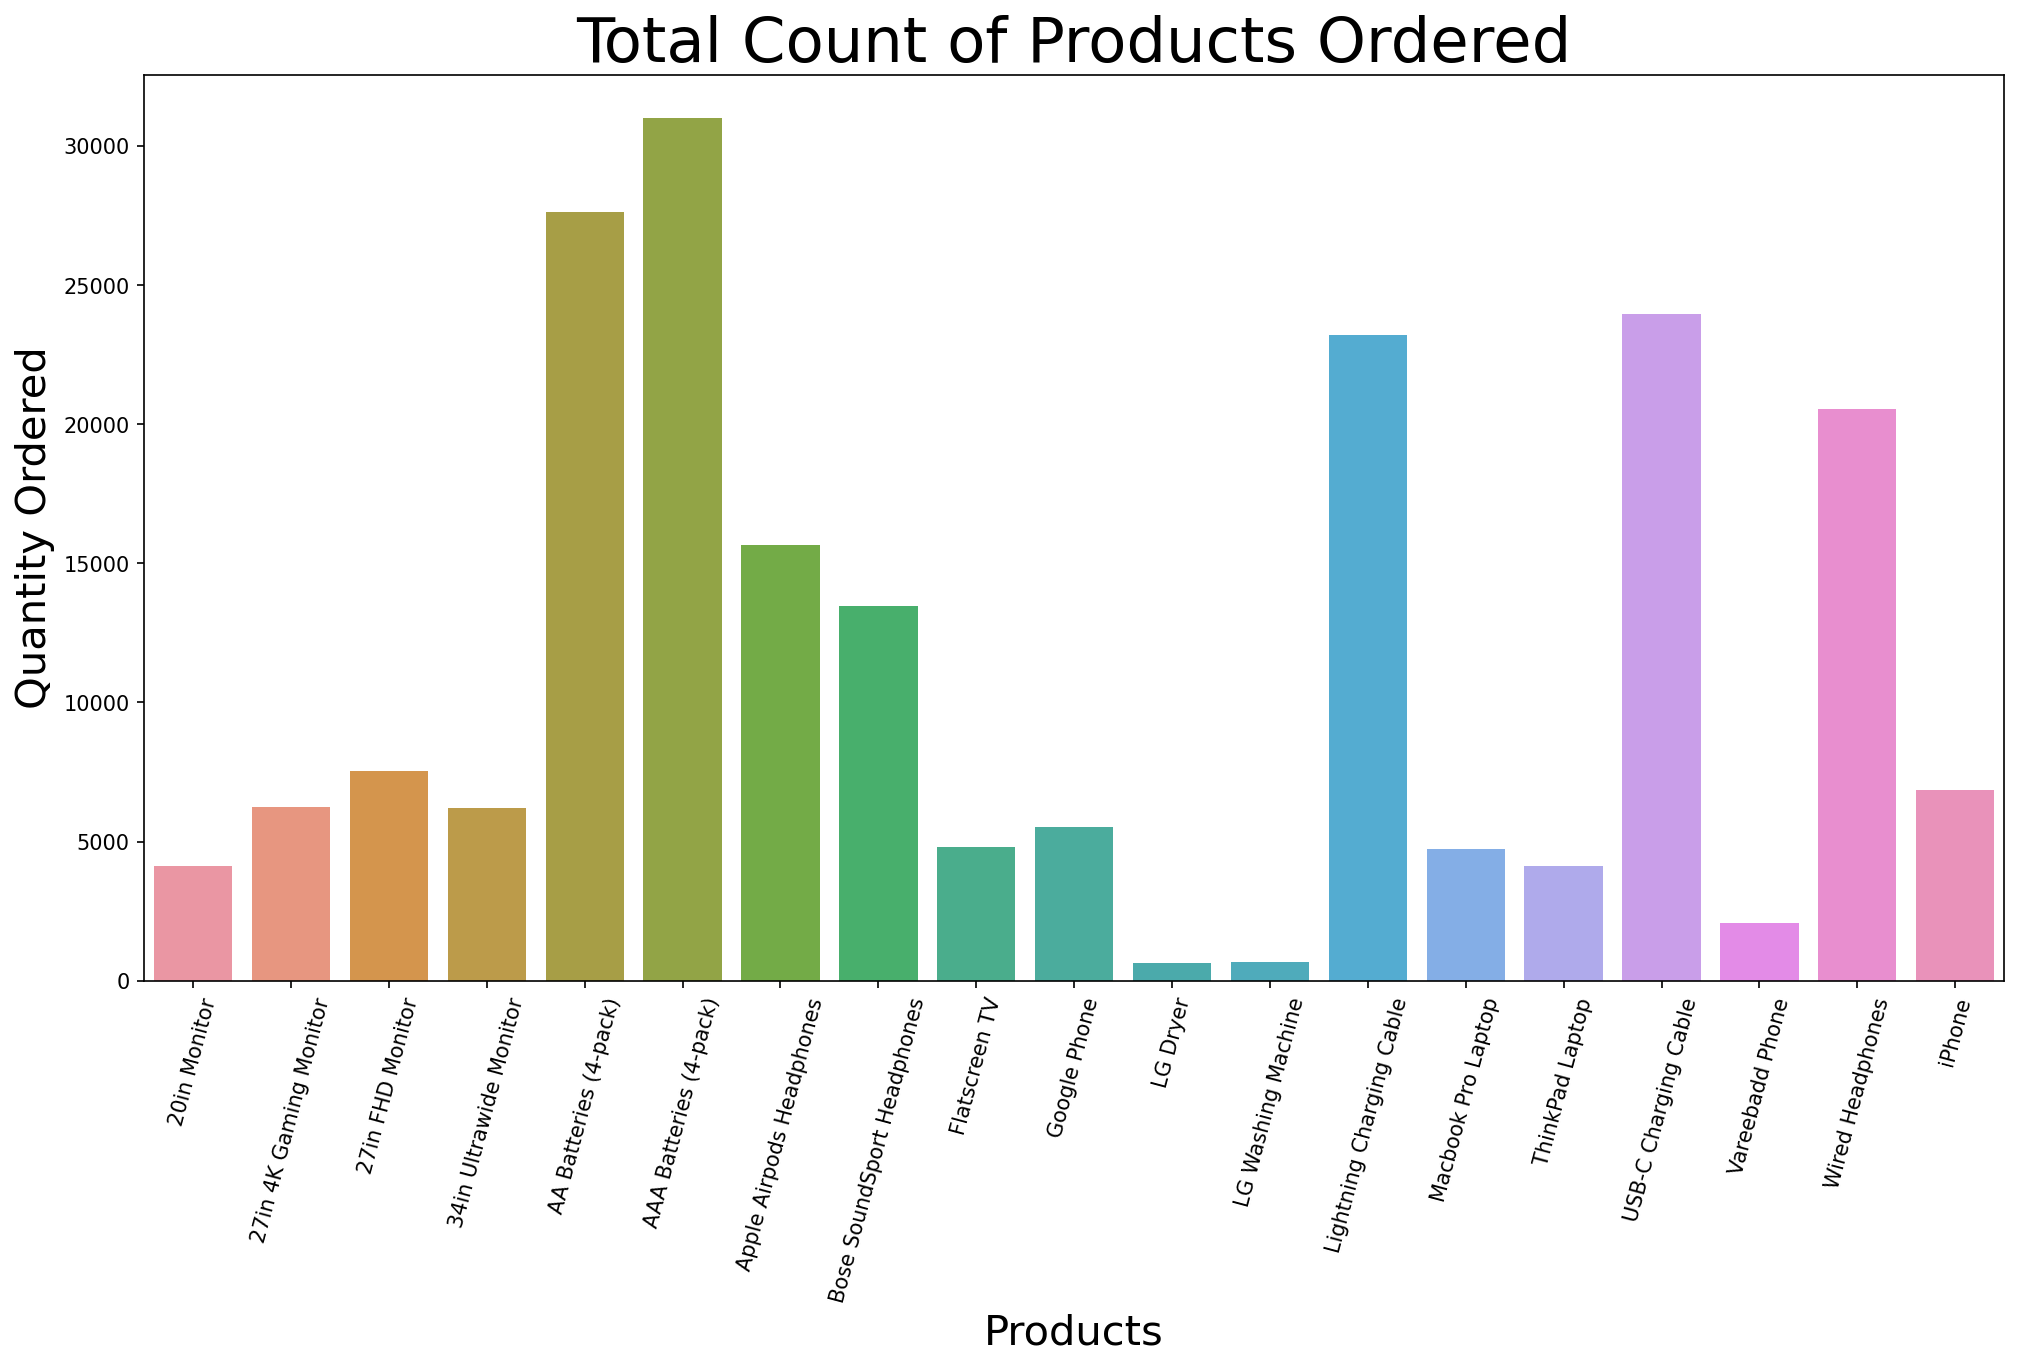

In [114]:
plt.figure(figsize = (16,8), dpi = 150)
sns.barplot(y = 'quantity ordered', x = 'product', data = total_ordered_product)
plt.xticks(rotation = 75, multialignment = 'right')
plt.title('Total Count of Products Ordered', size = 30)
plt.ylabel('Quantity Ordered', size = 20)
plt.xlabel('Products', size = 20);

In [129]:
# View the chart above in tabular form sorted by highest volume products
total_ordered_product.sort_values('quantity ordered', ascending = False, ignore_index = True)

,product,quantity ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


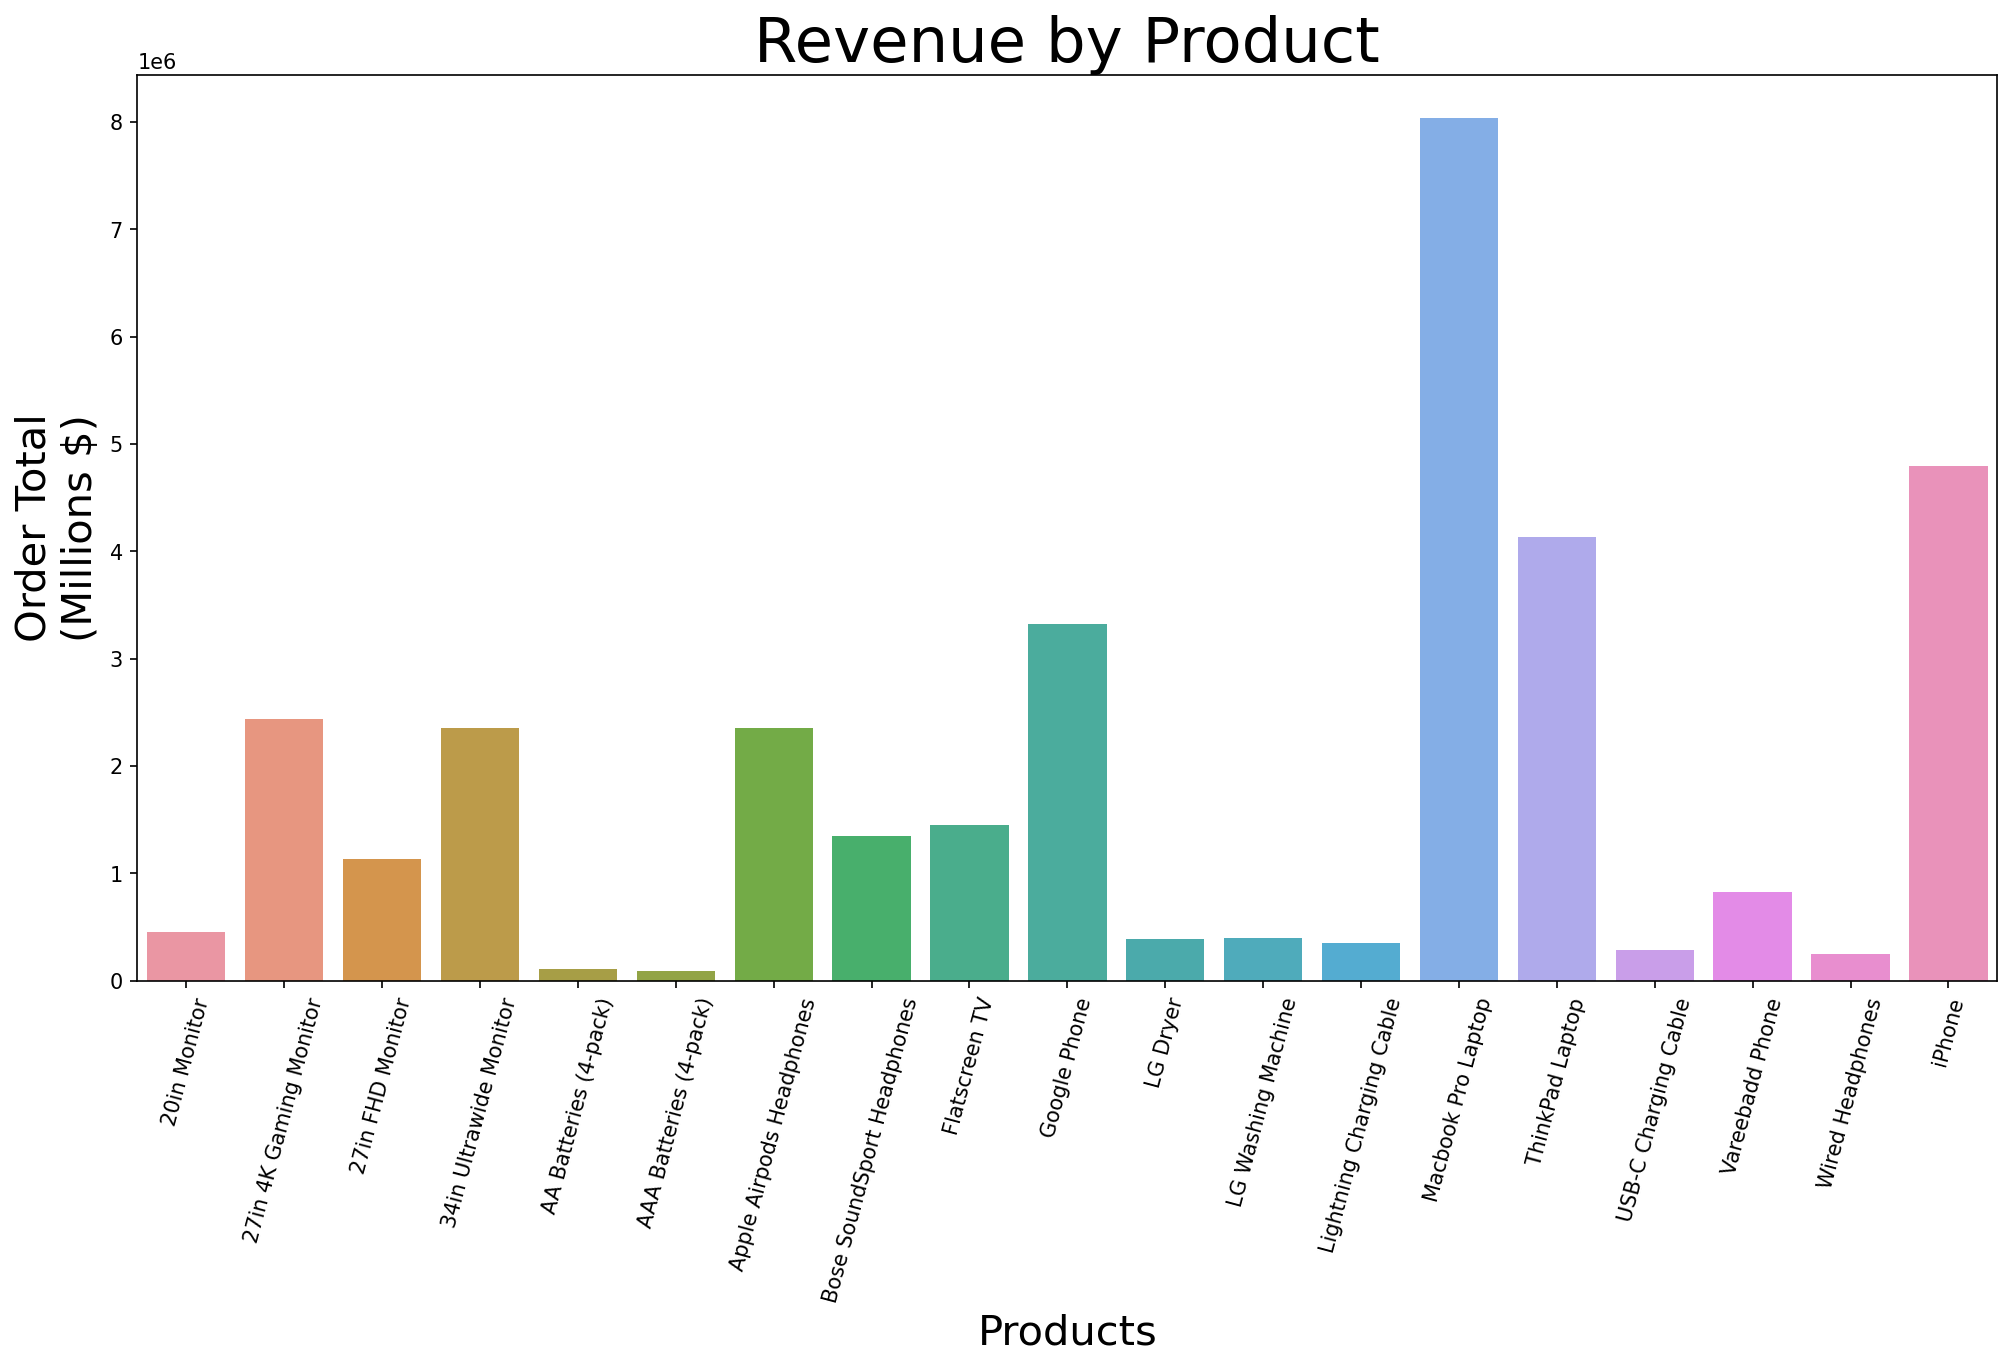

In [132]:
revenue_by_product = df.groupby('product', as_index = False)['order_total'].sum()

plt.figure(figsize = (16,8), dpi = 150)
sns.barplot(y = 'order_total', x = 'product', data = revenue_by_product)
plt.xticks(rotation = 75, multialignment = 'right')
plt.title('Revenue by Product', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('Products', size = 20);

In [126]:
# chart above in tabular form sorted by highest order total
revenue_by_product.sort_values('order_total', ascending = False, ignore_index = True)

,product,order_total
0,Macbook Pro Laptop,8037600.00
1,iPhone,4794300.00
2,ThinkPad Laptop,4129958.70
3,Google Phone,3319200.00
4,27in 4K Gaming Monitor,2435097.56
5,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
7,Flatscreen TV,1445700.00
8,Bose SoundSport Headphones,1345565.43
9,27in FHD Monitor,1132424.50


In [130]:
total_ordered_state= df.groupby('state', as_index = False)['quantity ordered'].sum()
total_ordered_city = df.groupby('city', as_index = False)['quantity ordered'].sum()

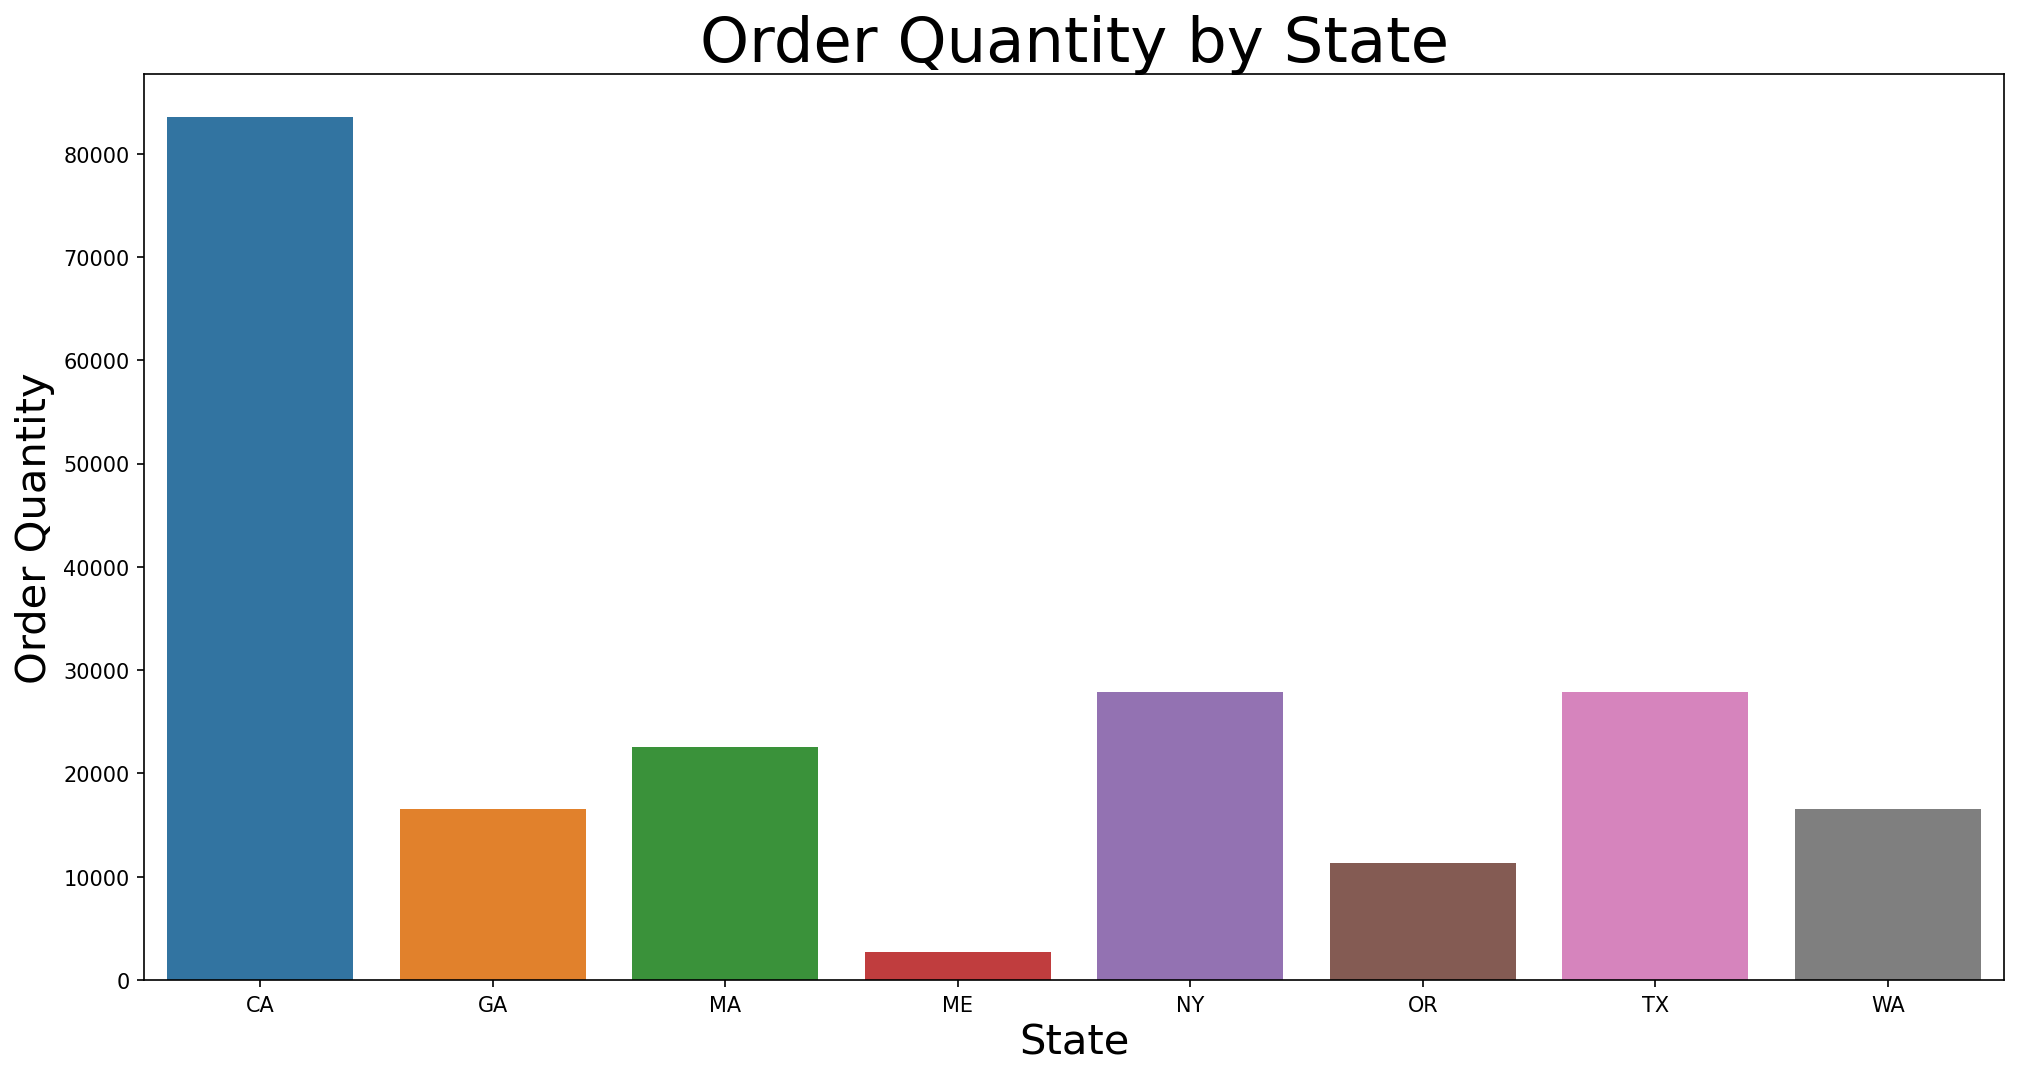

In [133]:
plt.figure(figsize = (16,8), dpi = 150)

sns.barplot(x = 'state', y = 'quantity ordered', data = total_ordered_state)
plt.title('Order Quantity by State', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

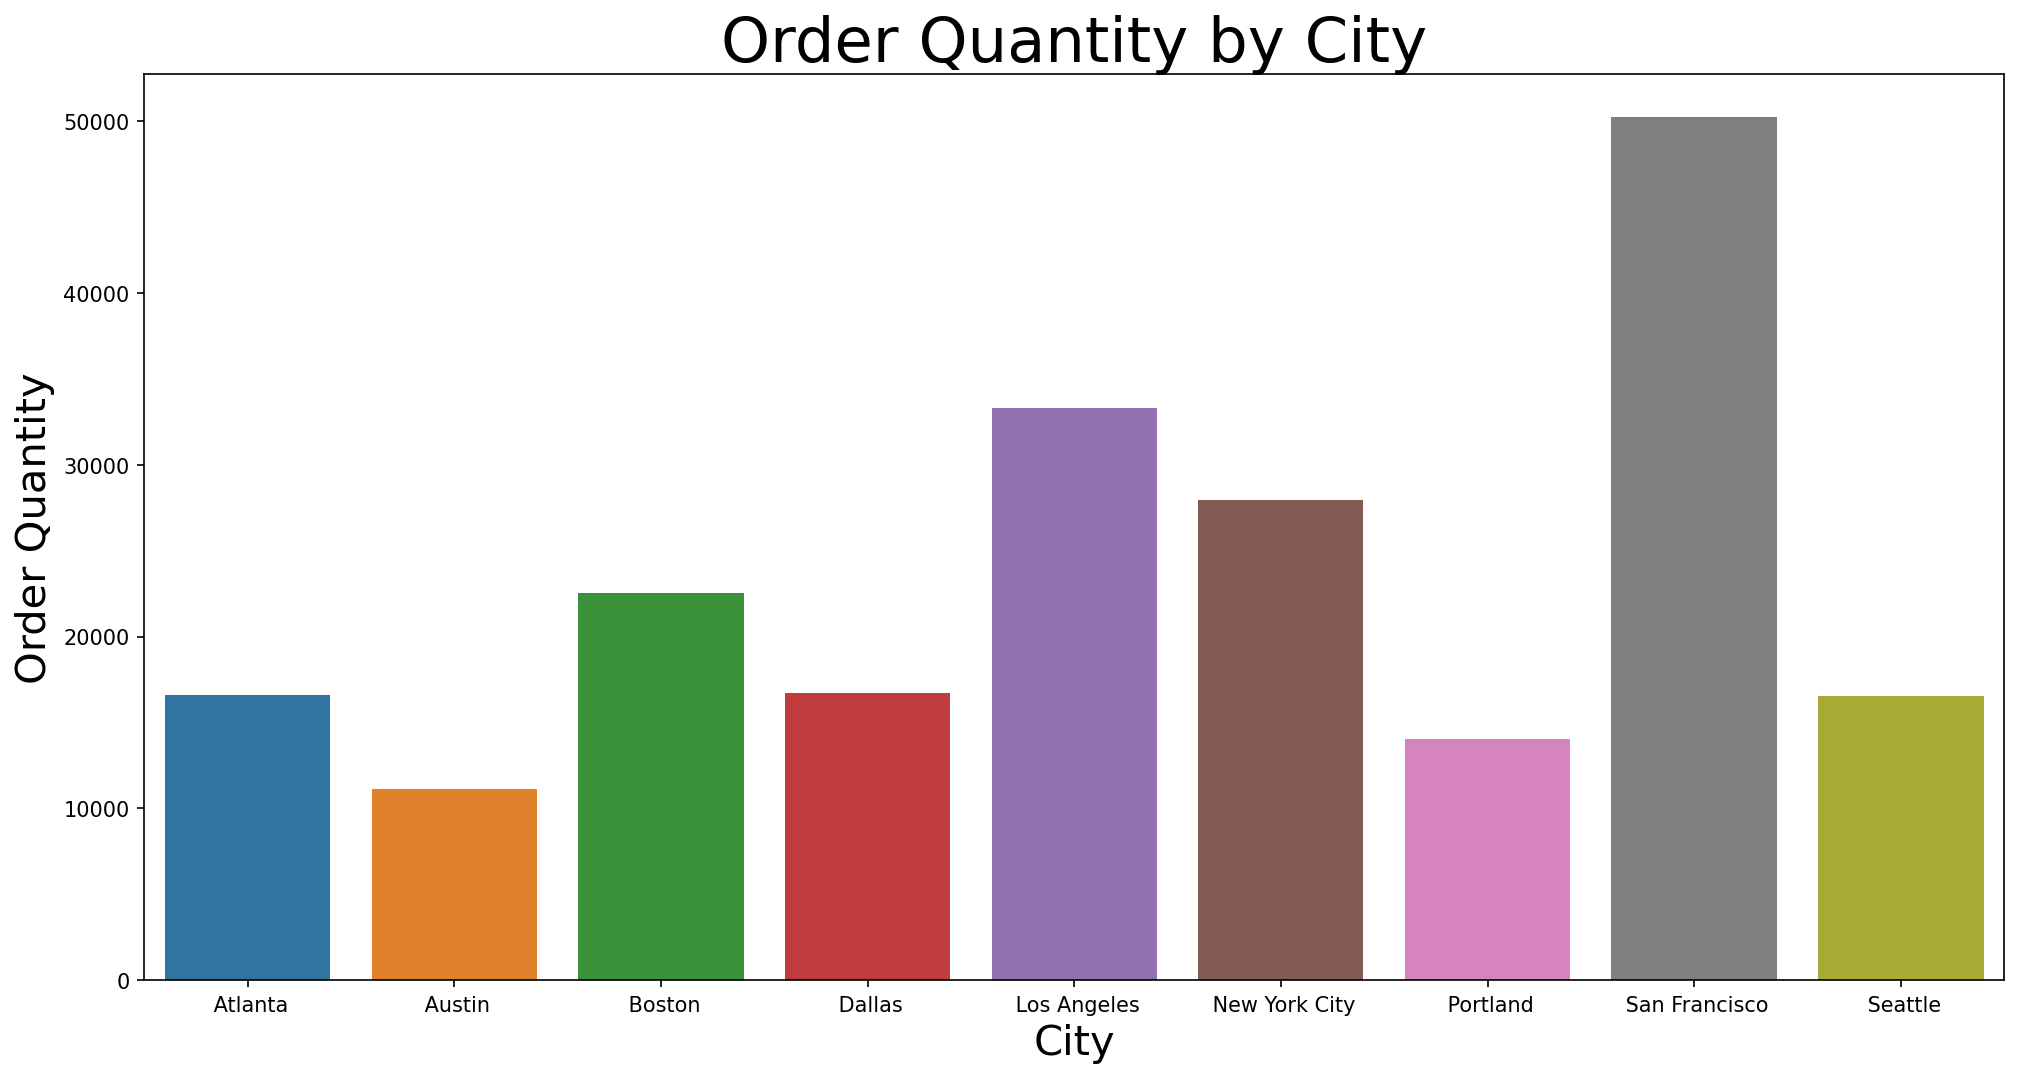

In [137]:
plt.figure(figsize = (16,8), dpi = 150)

sns.barplot(x = 'city', y = 'quantity ordered', data = total_ordered_city)
plt.title('Order Quantity by City', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('City', size = 20);

In [156]:
# Create a df for groupby order date

total_order_month = df.groupby(df['order date'].dt.month ).sum()

total_order_month

,quantity ordered,price each,order_total,address_id
order date,,,,
1,10903,1.811768e+06,1.822257e+06,553827090
2,13449,2.188885e+06,2.202022e+06,599222075
3,17005,2.791208e+06,2.807100e+06,1222519738
4,20558,3.367671e+06,3.390670e+06,156626027
5,18667,3.135125e+06,3.152607e+06,1466520362
6,15253,2.562026e+06,2.577802e+06,995096568
7,16072,2.632540e+06,2.647776e+06,924268421
8,13448,2.230345e+06,2.244468e+06,261045288
9,13109,2.084992e+06,2.097560e+06,1291097992


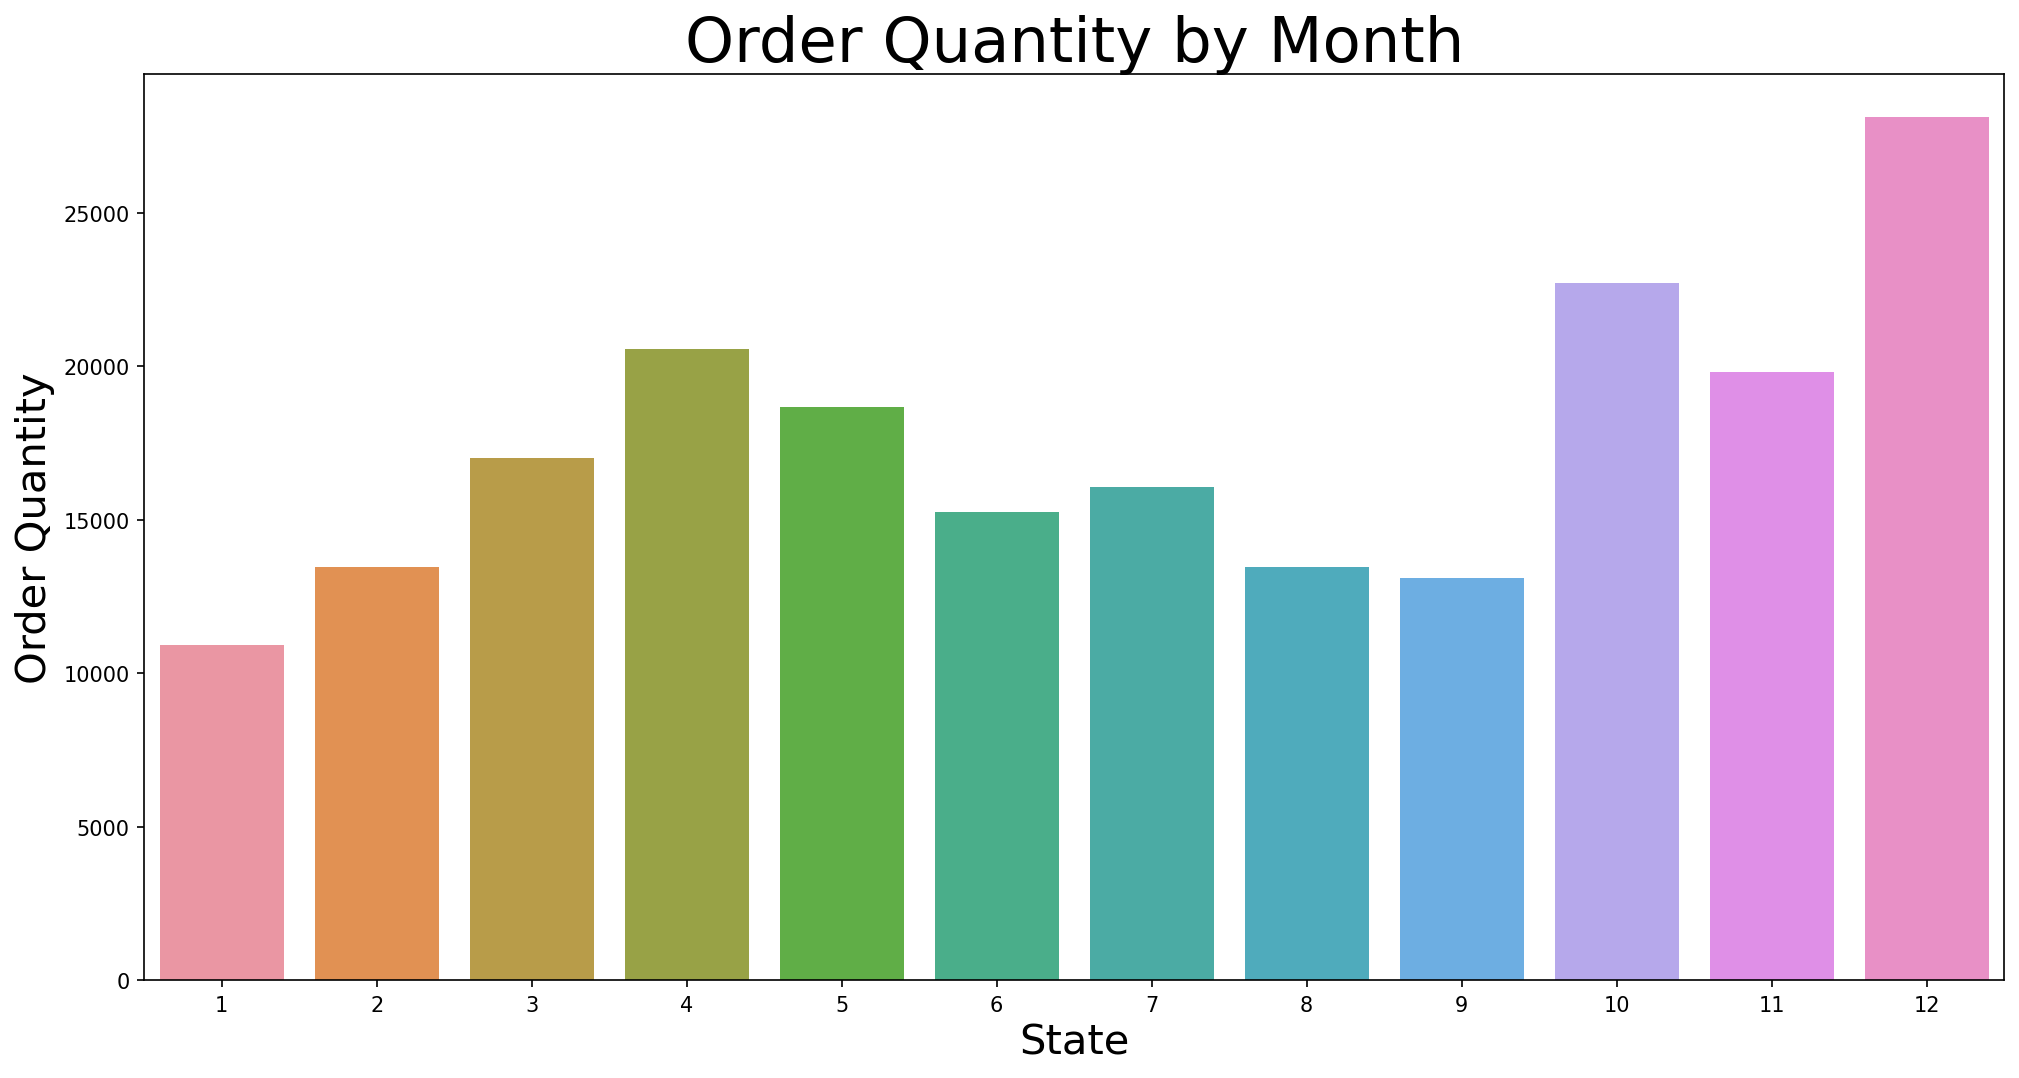

In [155]:
plt.figure(figsize = (16,8),dpi = 150)
plt.xticks(range(1,13))
sns.barplot(x = total_order_month.index, y = 'quantity ordered', data = total_order_month)

plt.title('Order Quantity by Month', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

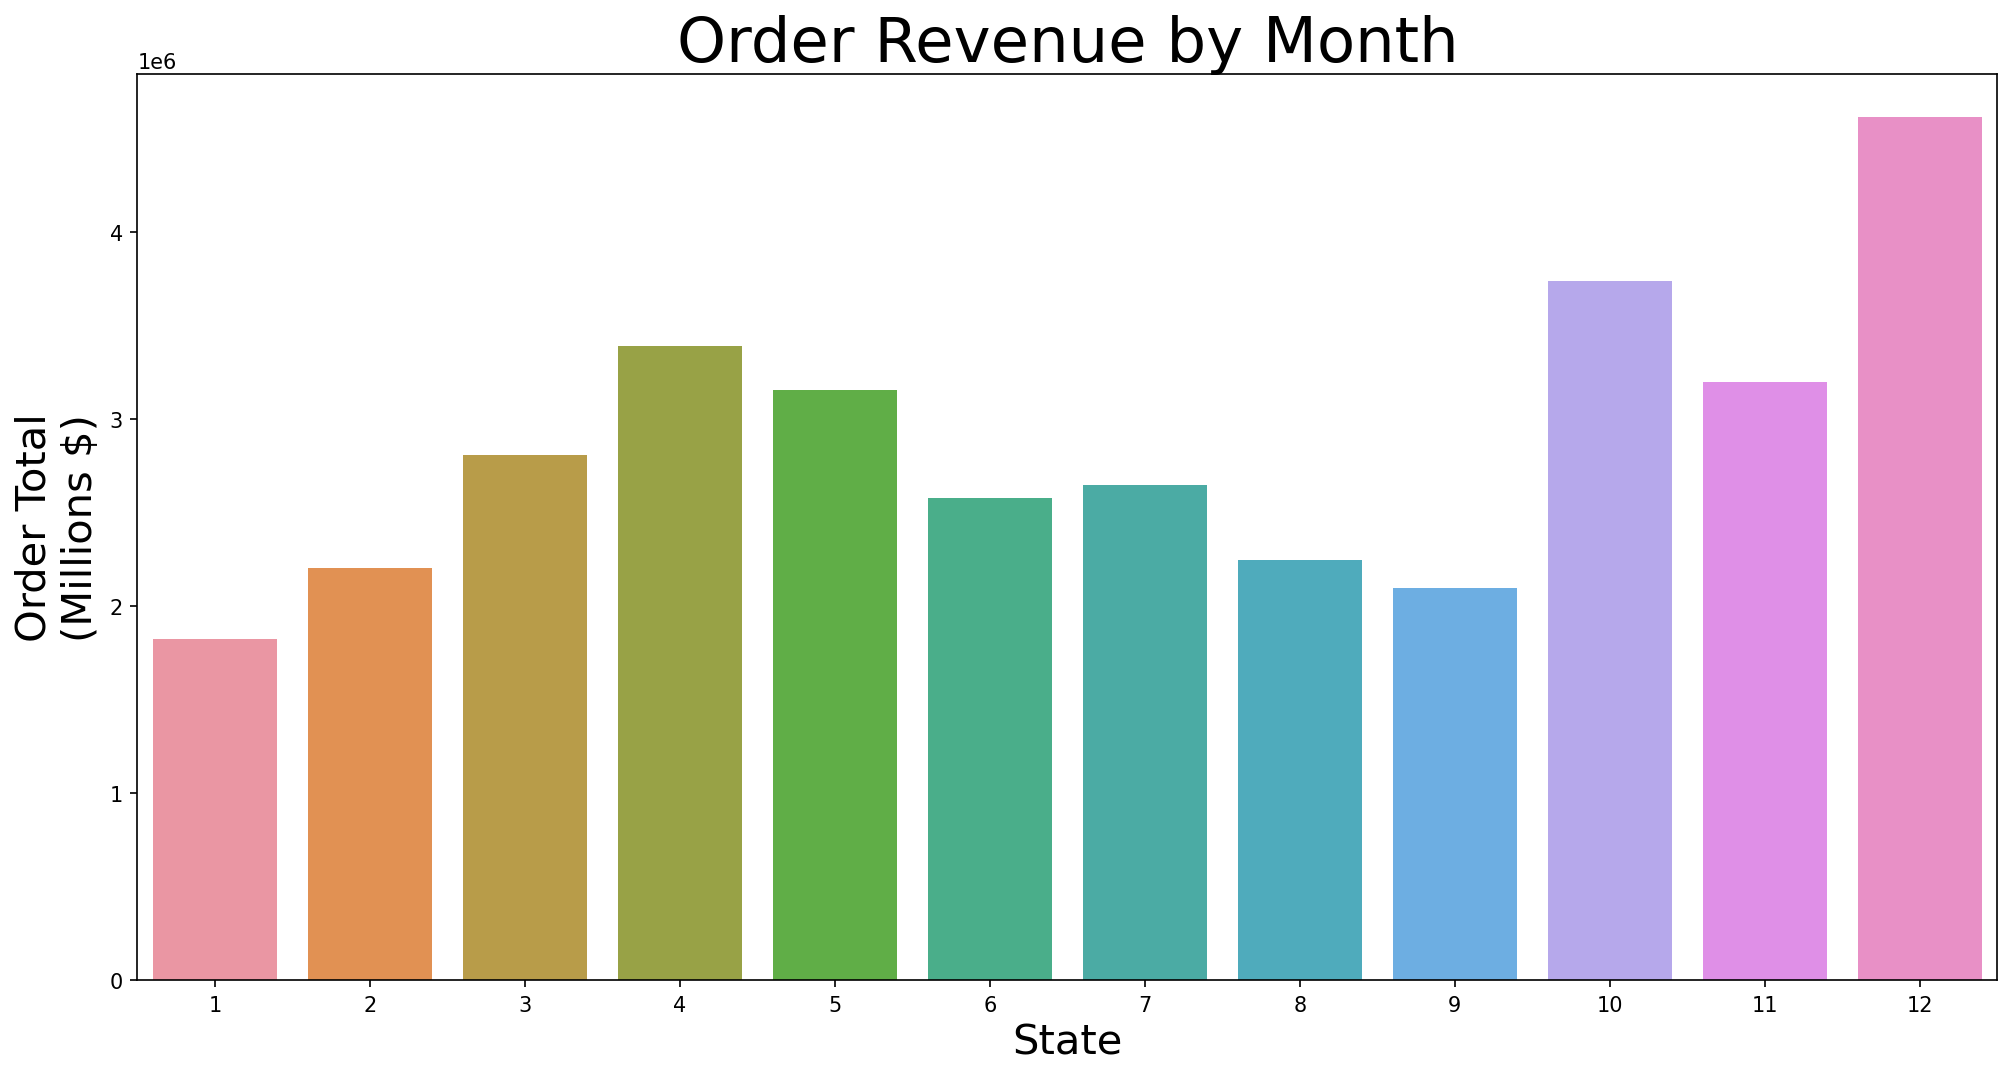

In [171]:
plt.figure(figsize = (16,8),dpi = 150)

sns.barplot(x = total_order_month.index, y = 'order_total', data = total_order_month)

plt.title('Order Revenue by Month', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('State', size = 20);

In [174]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX,0
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA,1
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,2
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,3


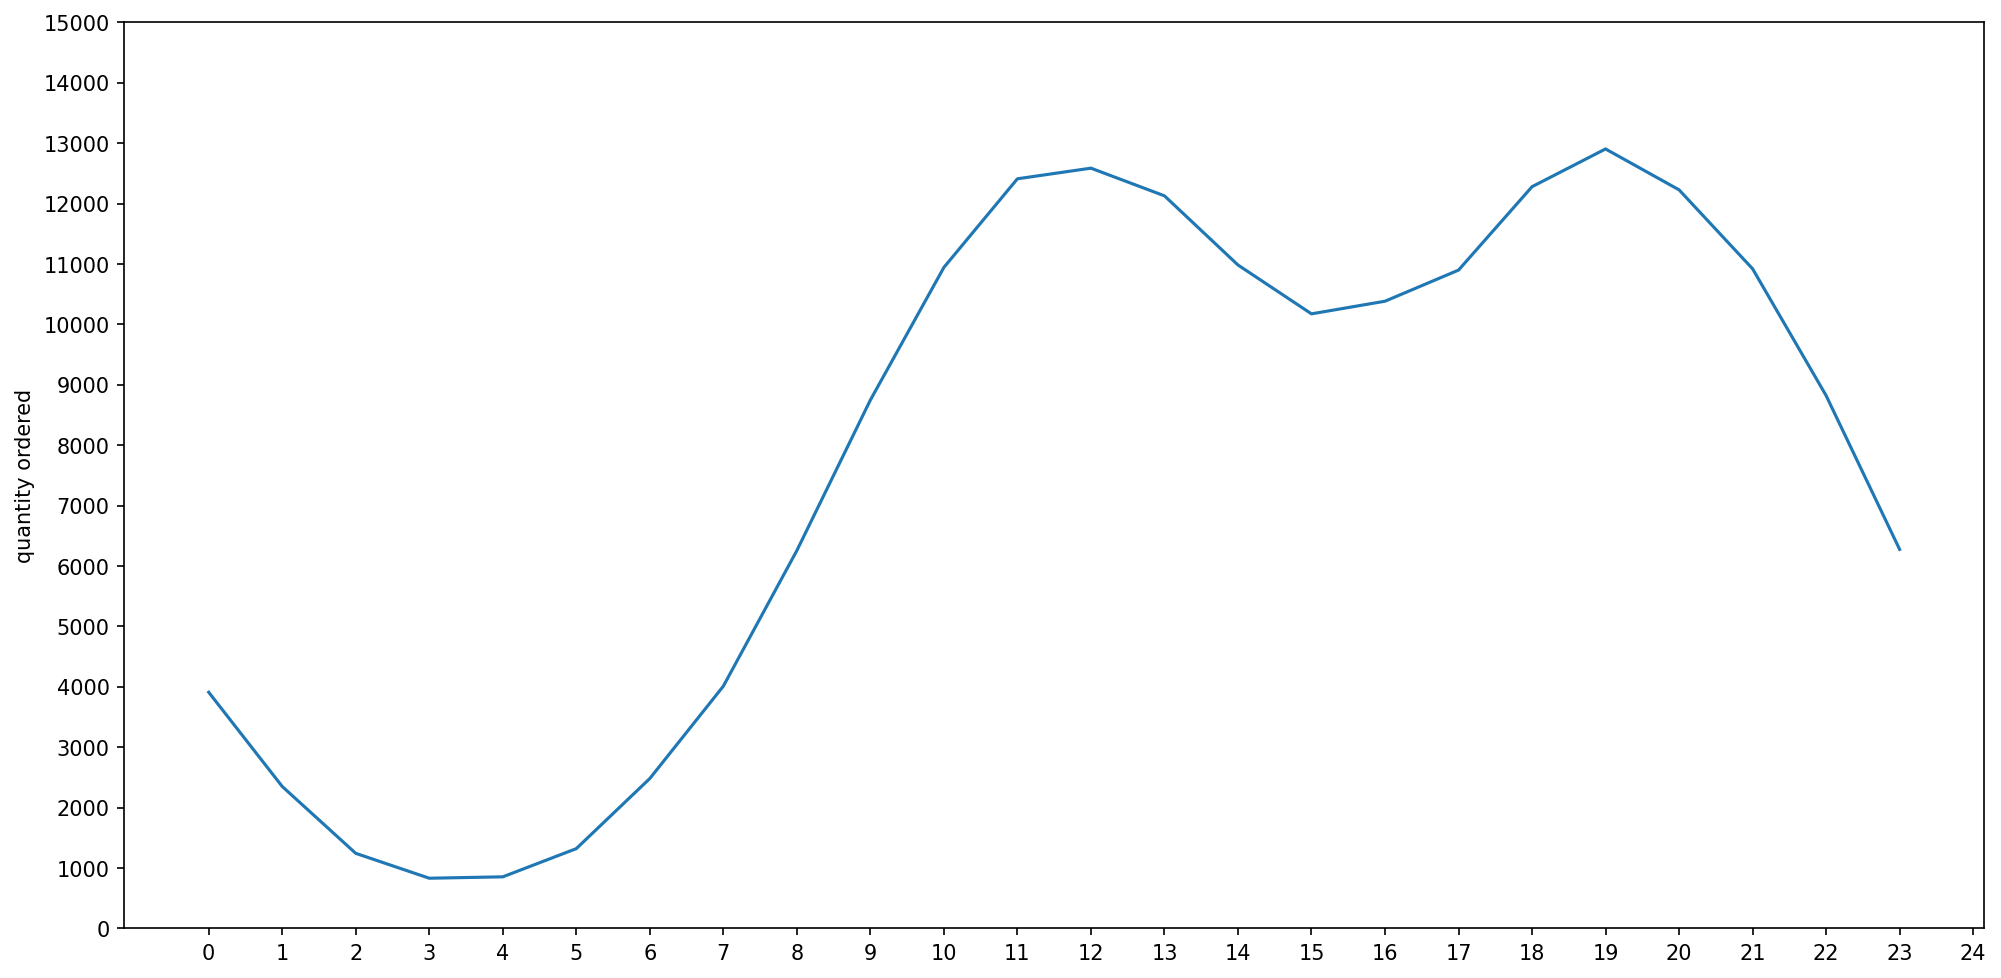

In [215]:
#Create a df to view orders by time of day

order_count_time = df.groupby(df['order date'].dt.hour, as_index = False)['quantity ordered'].count()

plt.figure(figsize = (16,8),dpi = 150)
sns.lineplot(x = order_count_time.index, y = 'quantity ordered', data = order_count_time)
plt.xticks(range(0,25))
plt.yticks(range(0,16000,1000));
